<a href="https://colab.research.google.com/github/Kadampradnya2002/College-Online-Complaint-App/blob/main/employee_management_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee Management System

In [5]:
# **Step 1: Loading the Dataset**

# Importing necessary libraries
import pandas as pd

# Loading the dataset
df = pd.read_csv("/HR_dataset.csv")

# Displaying the first few rows of the dataset
df.head()

,EmployeeID,Age,Gender,Department,Tenure,JobRole,Salary,JobSatisfaction,PerformanceRating,WorkLifeBalance,NumCompaniesWorked,EducationField,TrainingTimesLastYear,HasLeft,Skills,PromotionsLast5Years
0,9481,58,Female,Sales,3,Associate,193820,3,1,2,1,Art,2,0,"Management, Project Management",2
1,9482,48,Other,Design,7,Manager,122621,4,4,2,0,Business,1,1,Business Development,2
2,9483,34,Female,IT,1,Associate,105374,1,2,4,4,Science,5,0,IT,0
3,9484,27,Female,Procurement,1,Senior,64912,2,3,3,5,Commerce,4,1,Finance,2
4,9485,40,Female,IT,7,Manager,32879,2,3,4,8,Engineering,3,0,"IT, Project Management, Sales",0


In [6]:
# Checking basic information of the dataset including the data types and potential missing values
print(df.info())

# Getting a summary of statistics for numerical columns
print(df.describe())

# Checking for any missing values in the dataset
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             1500 non-null   int64 
 1   Age                    1500 non-null   int64 
 2   Gender                 1500 non-null   object
 3   Department             1500 non-null   object
 4   Tenure                 1500 non-null   int64 
 5   JobRole                1500 non-null   object
 6   Salary                 1500 non-null   int64 
 7   JobSatisfaction        1500 non-null   int64 
 8   PerformanceRating      1500 non-null   int64 
 9   WorkLifeBalance        1500 non-null   int64 
 10  NumCompaniesWorked     1500 non-null   int64 
 11  EducationField         1500 non-null   object
 12  TrainingTimesLastYear  1500 non-null   int64 
 13  HasLeft                1500 non-null   int64 
 14  Skills                 1500 non-null   object
 15  PromotionsLast5Years 

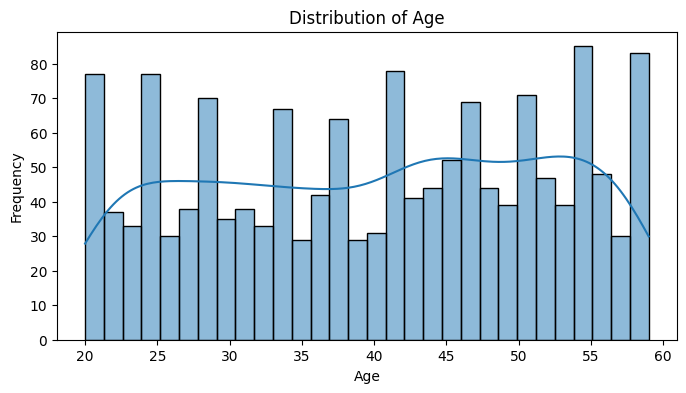

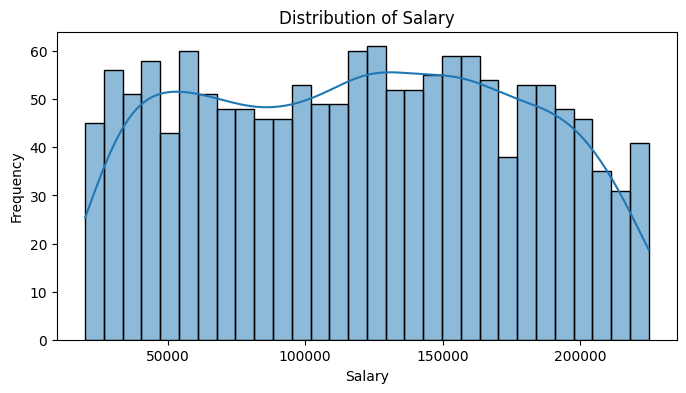

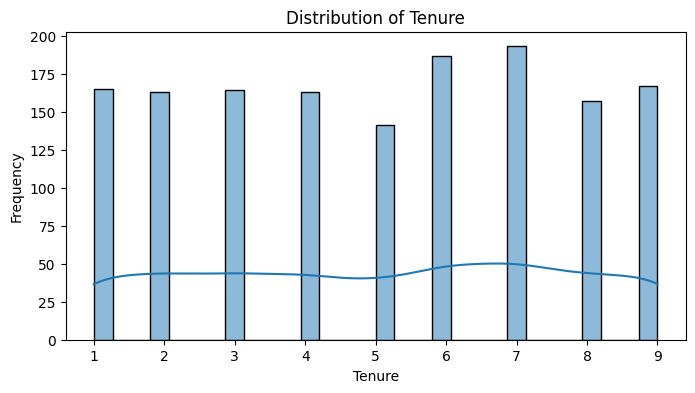

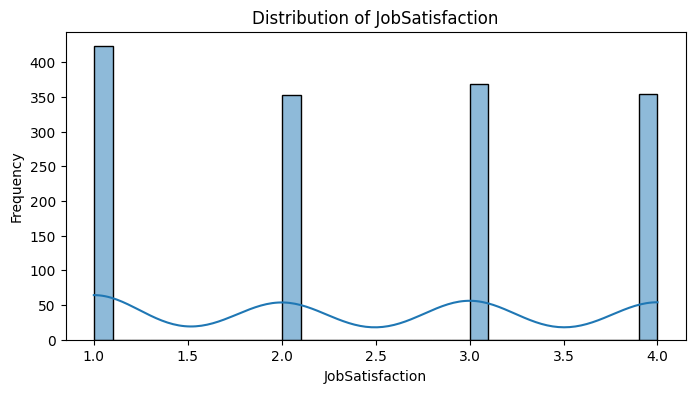

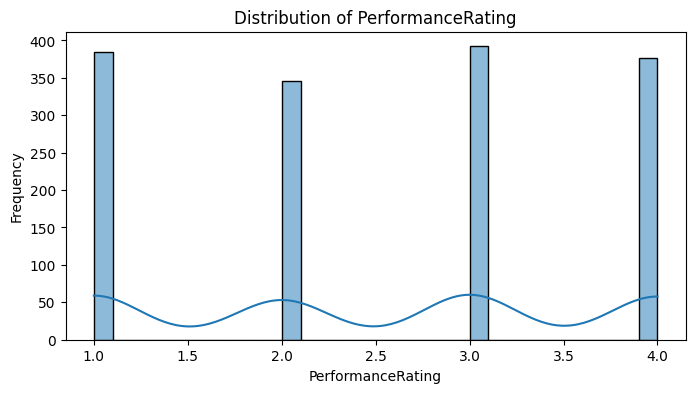

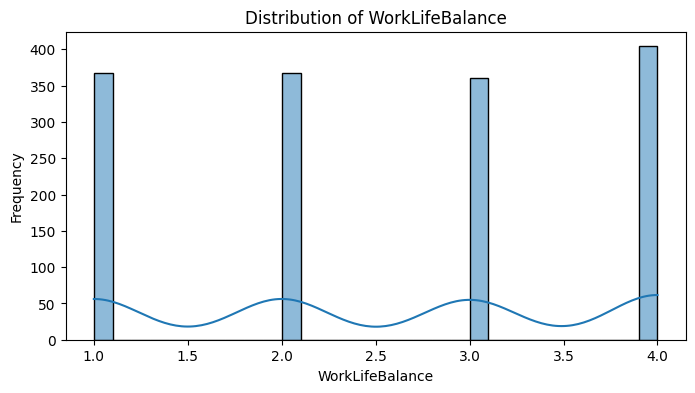

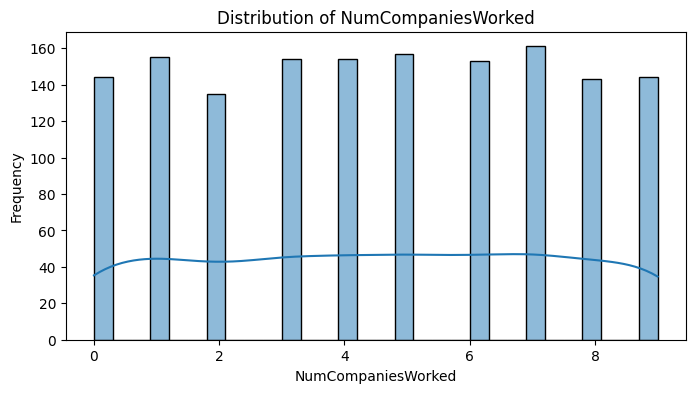

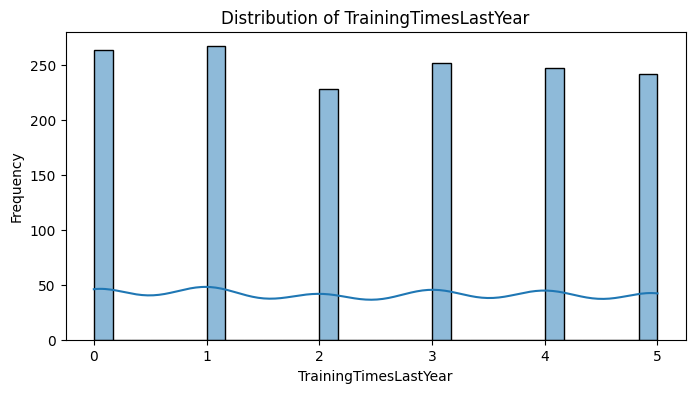

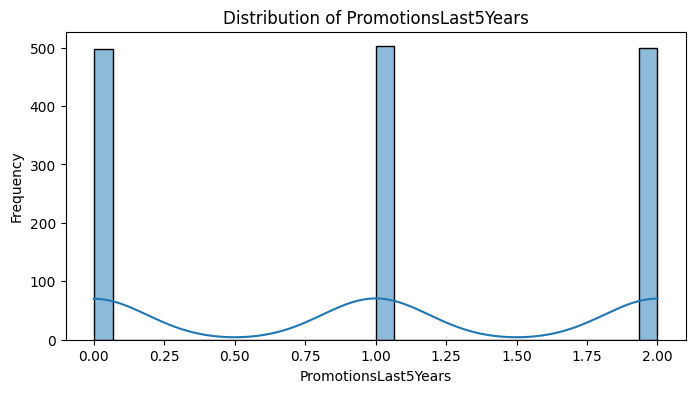

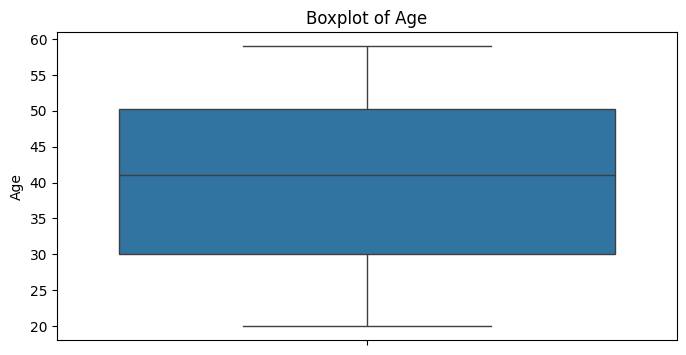

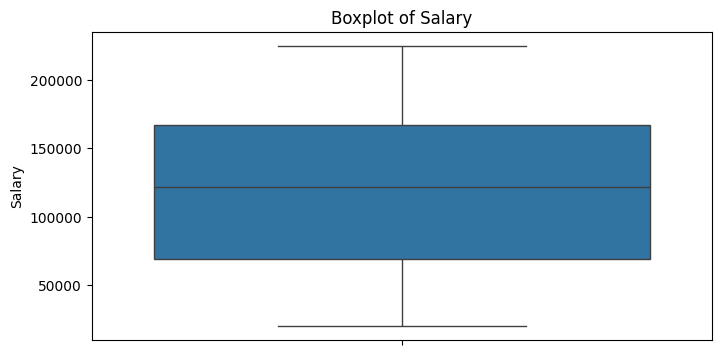

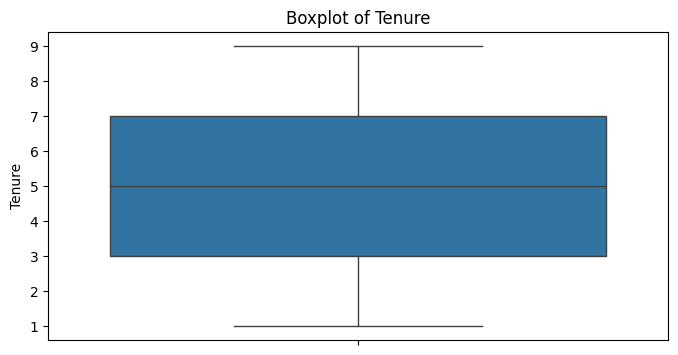

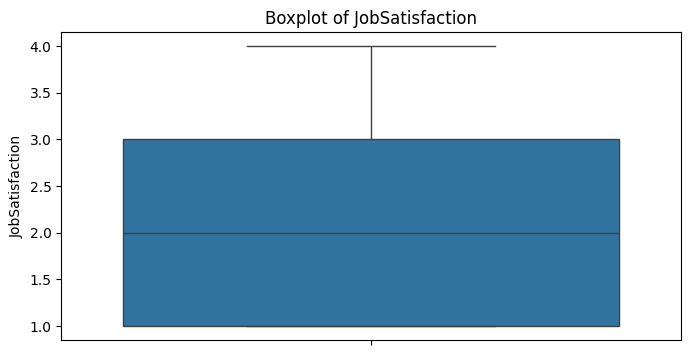

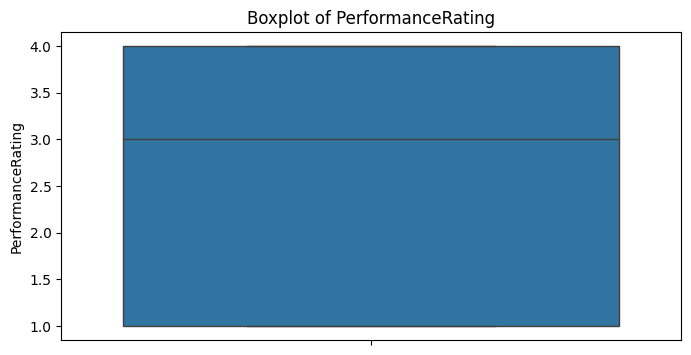

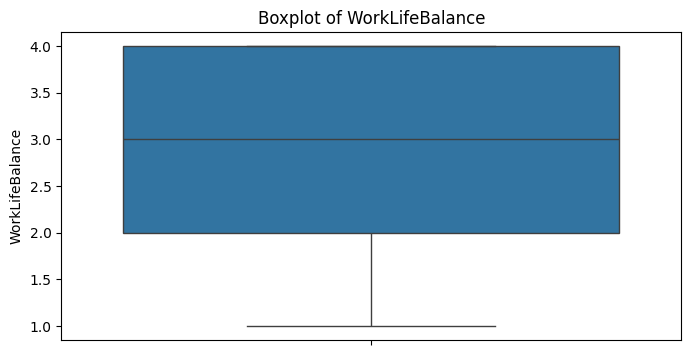

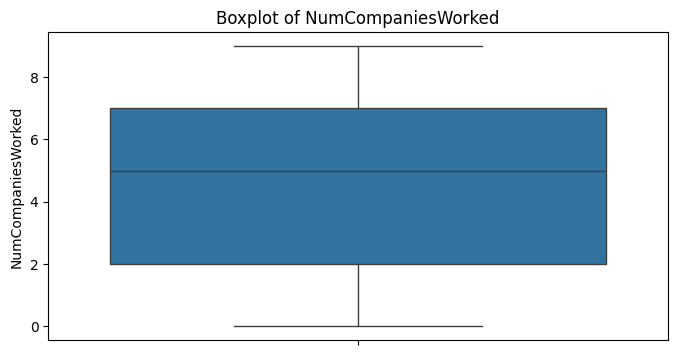

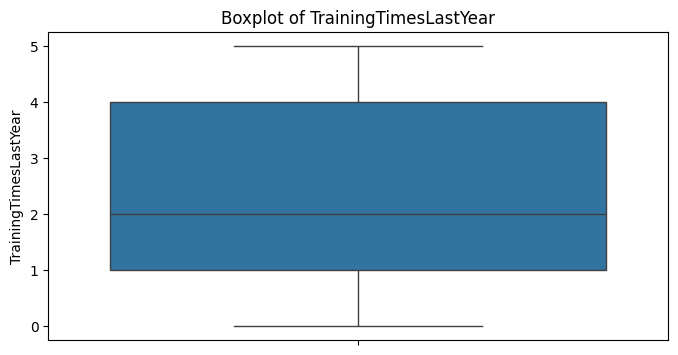

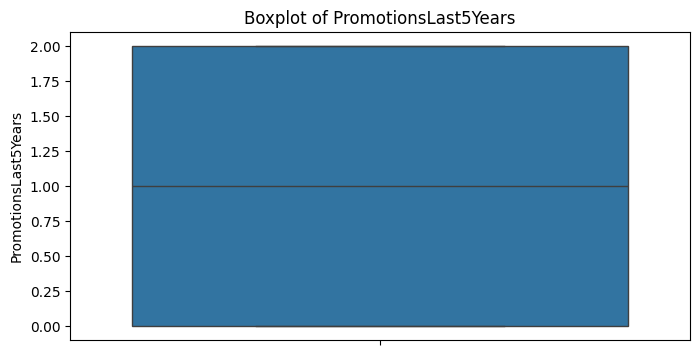

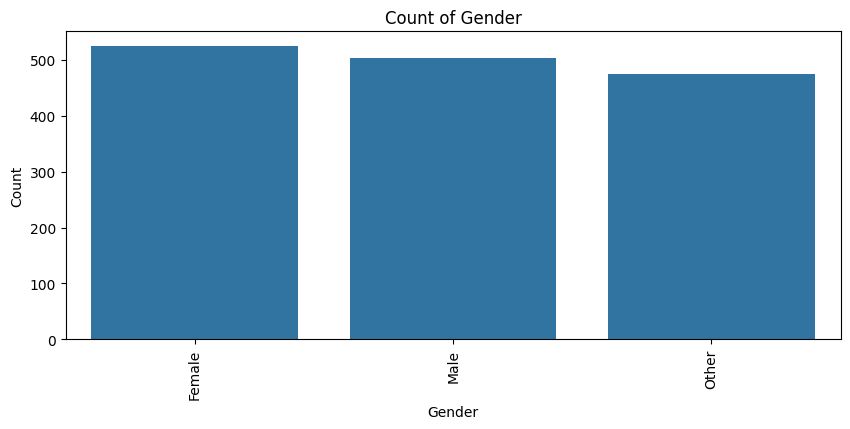

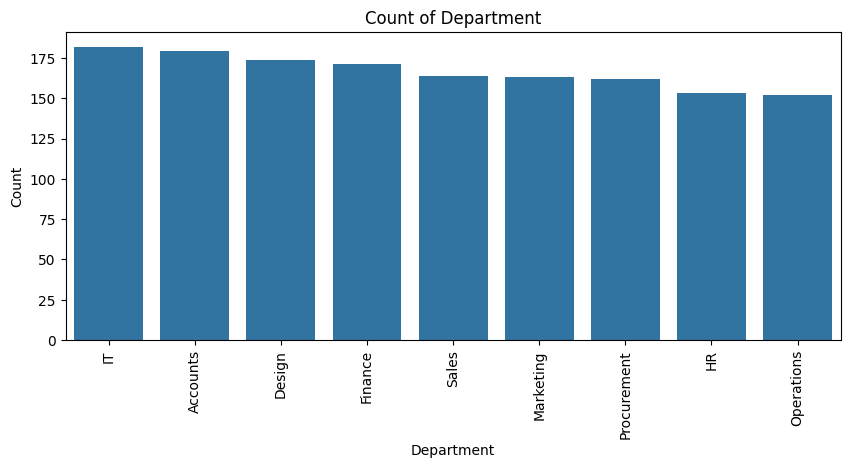

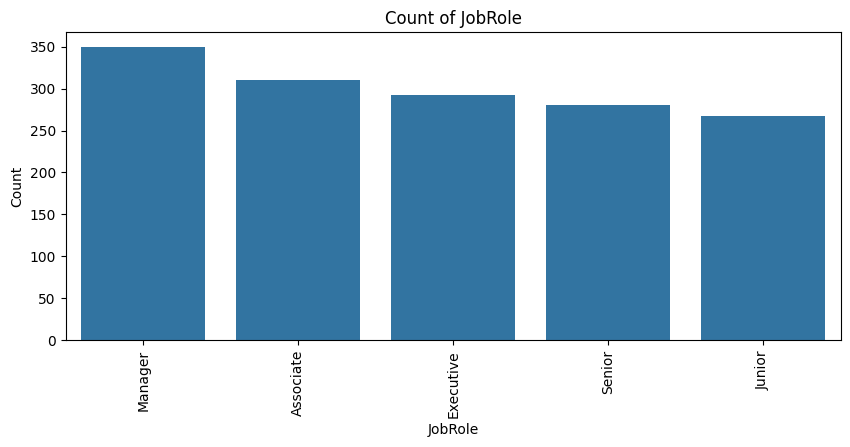

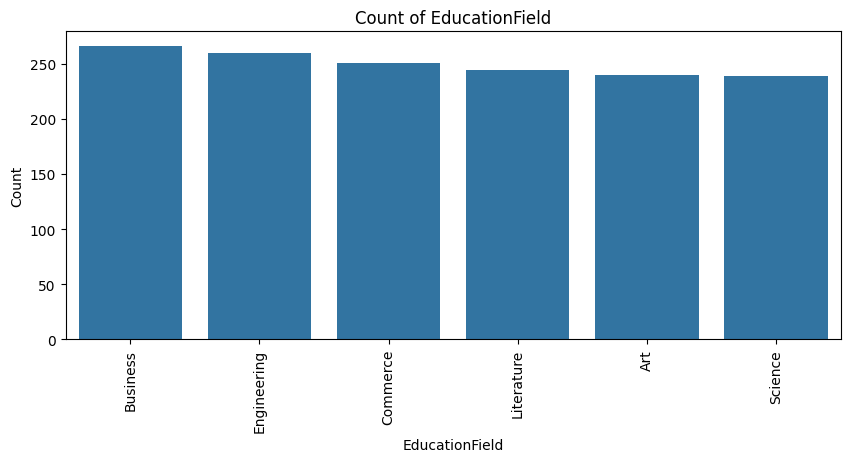

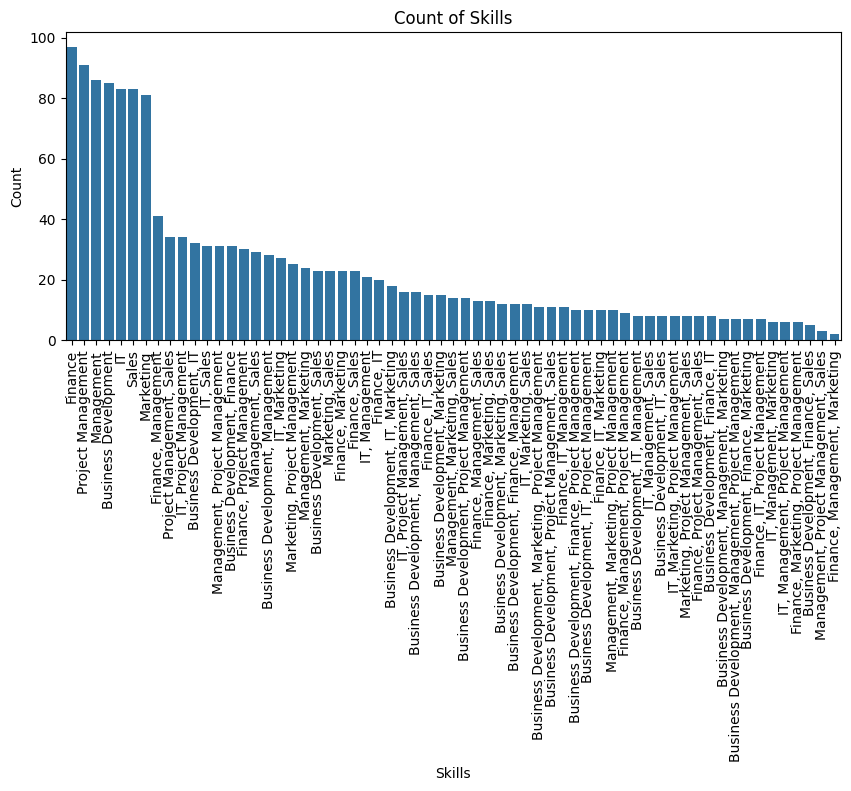

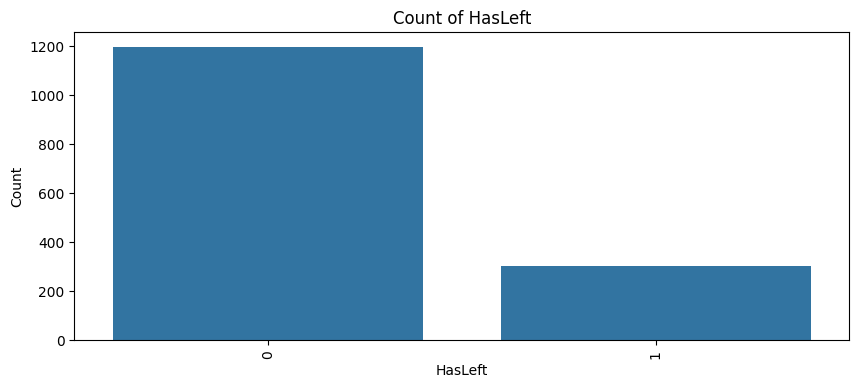

In [7]:

# **Step 2: Univariate Analysis (Understanding Each Variable)**
import matplotlib.pyplot as plt
import seaborn as sns



# Creating list of numerical columns for histograms
numerical_columns = ['Age', 'Salary', 'Tenure', 'JobSatisfaction', 'PerformanceRating',
                     'WorkLifeBalance', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'PromotionsLast5Years']

# Histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to detect outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

# Defining categorical columns
categorical_columns = ['Gender', 'Department', 'JobRole', 'EducationField', 'Skills', 'HasLeft']

# Count plots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()



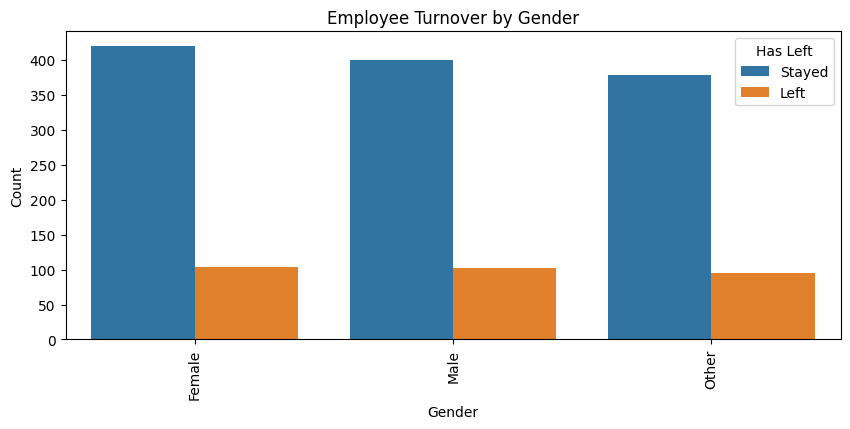

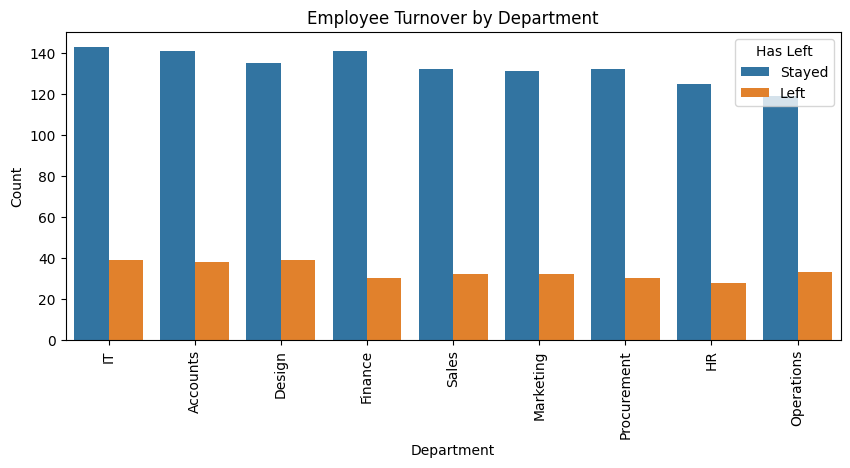

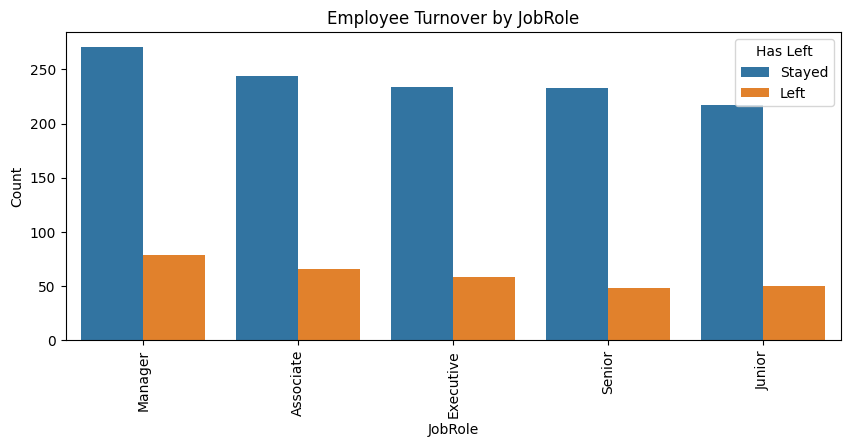

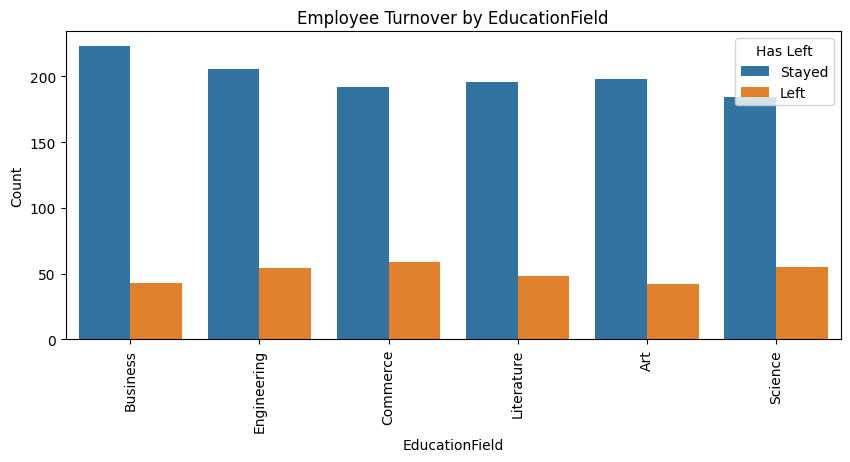

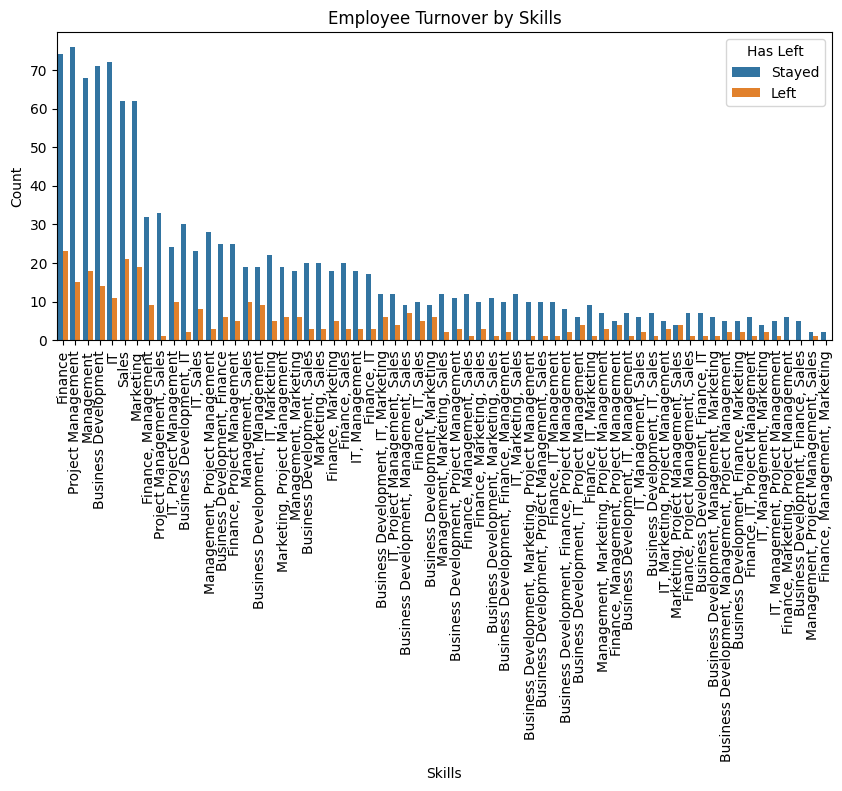

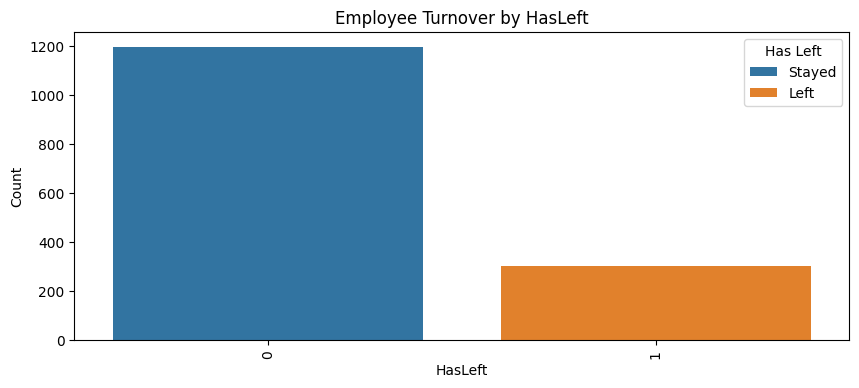

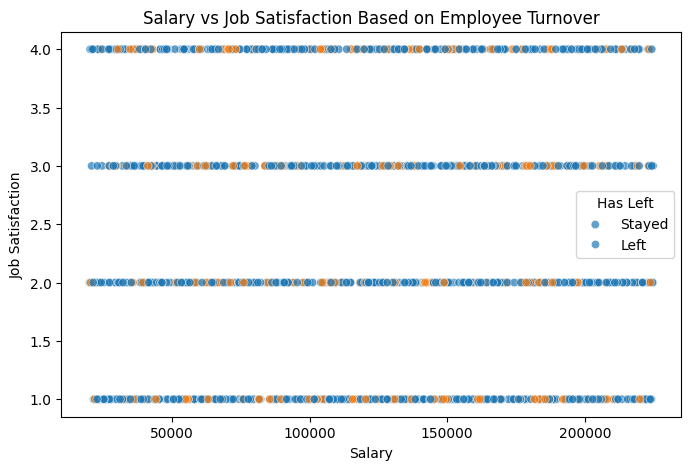

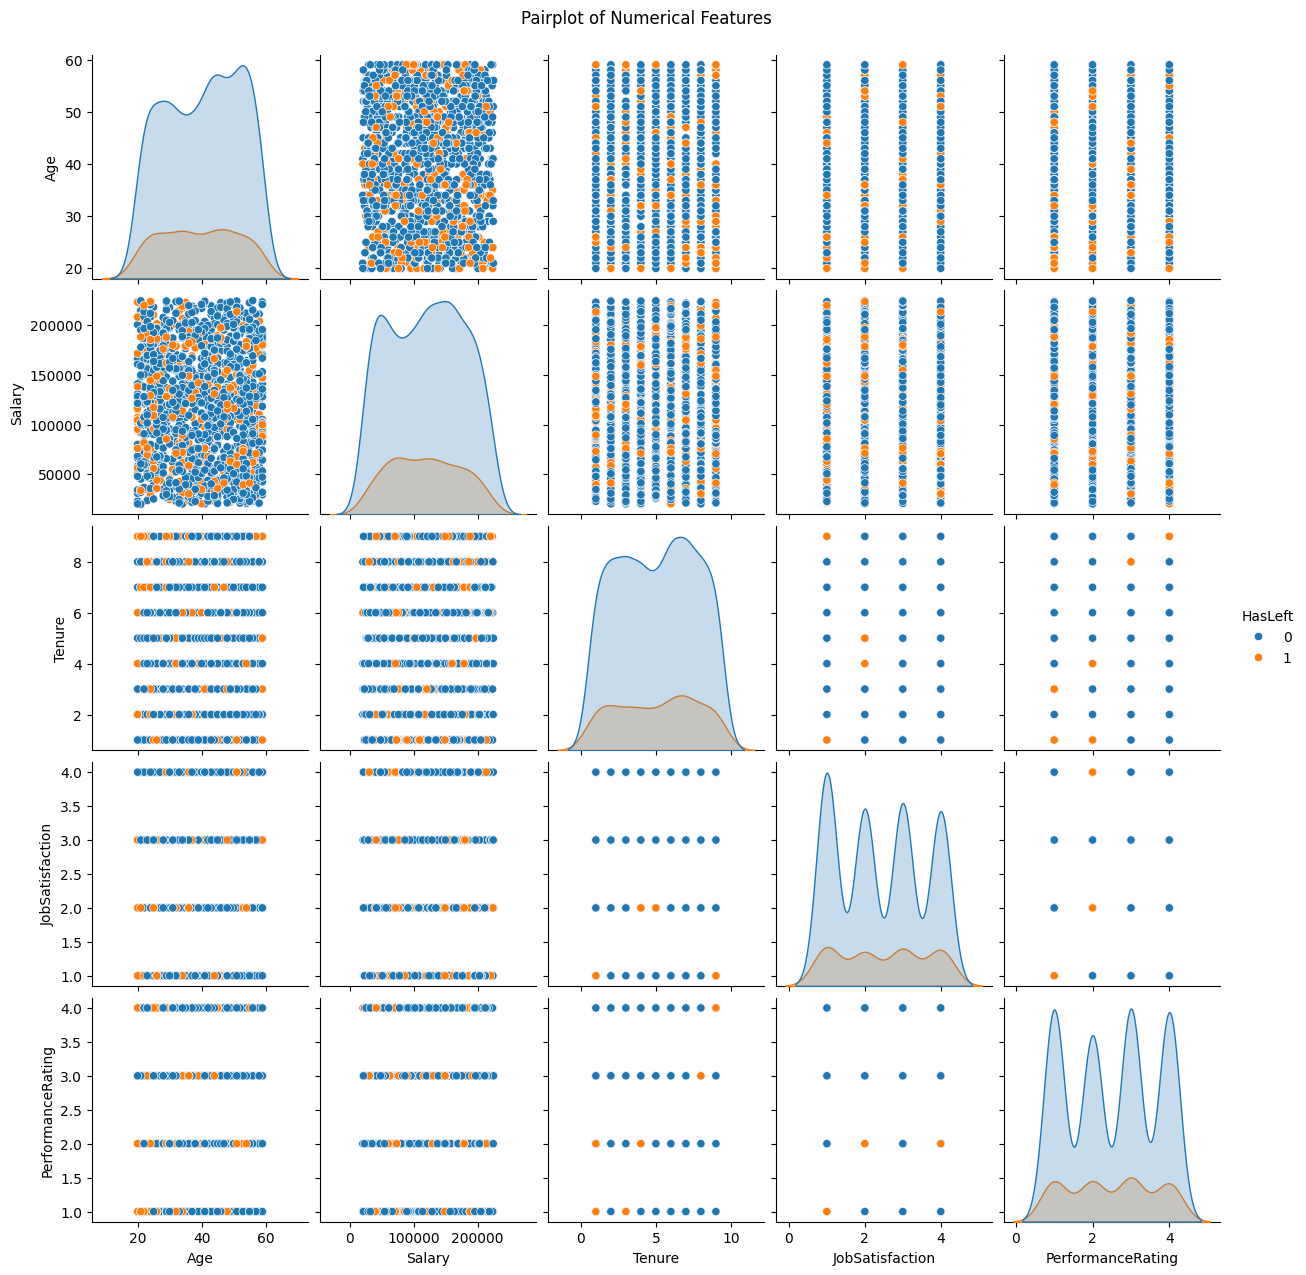

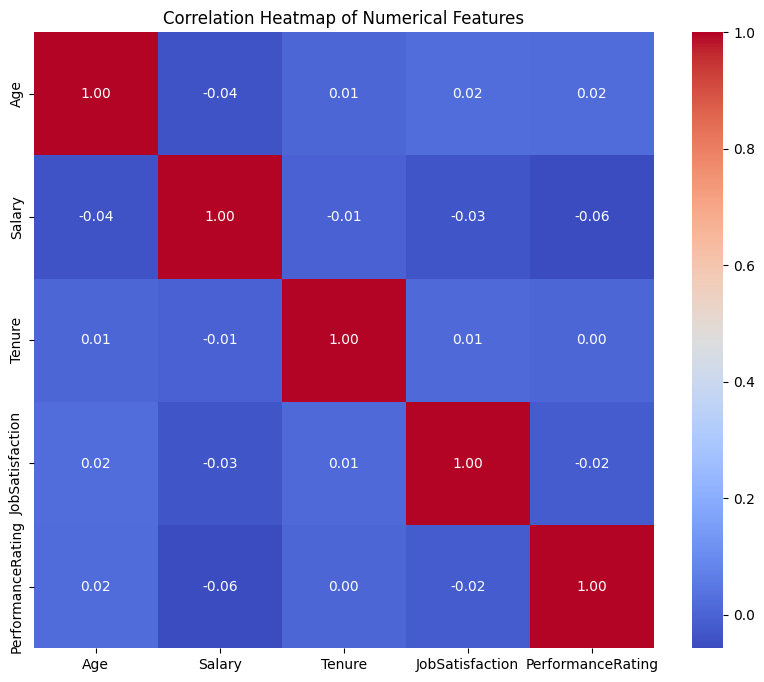

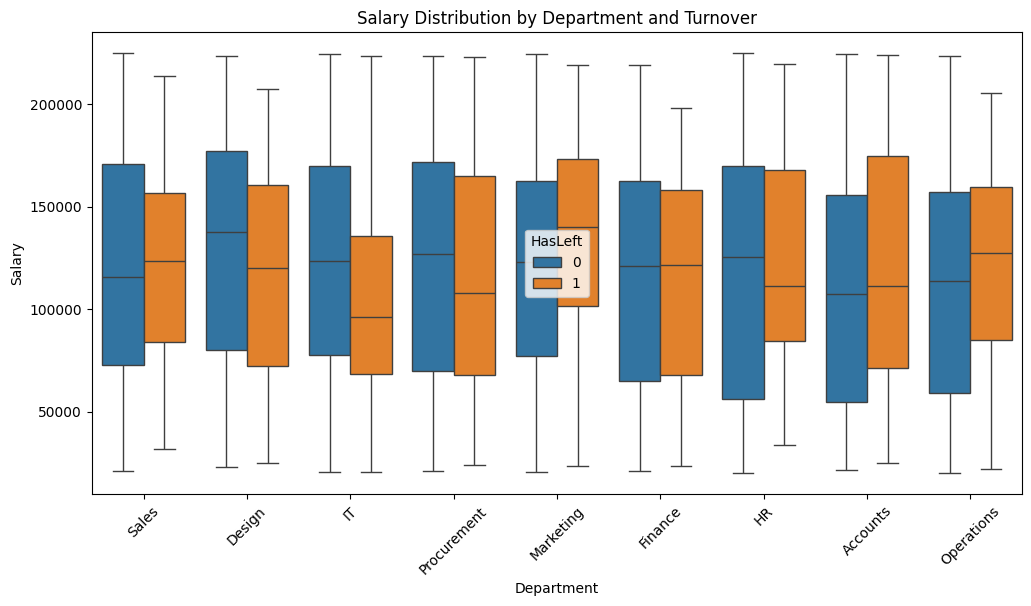

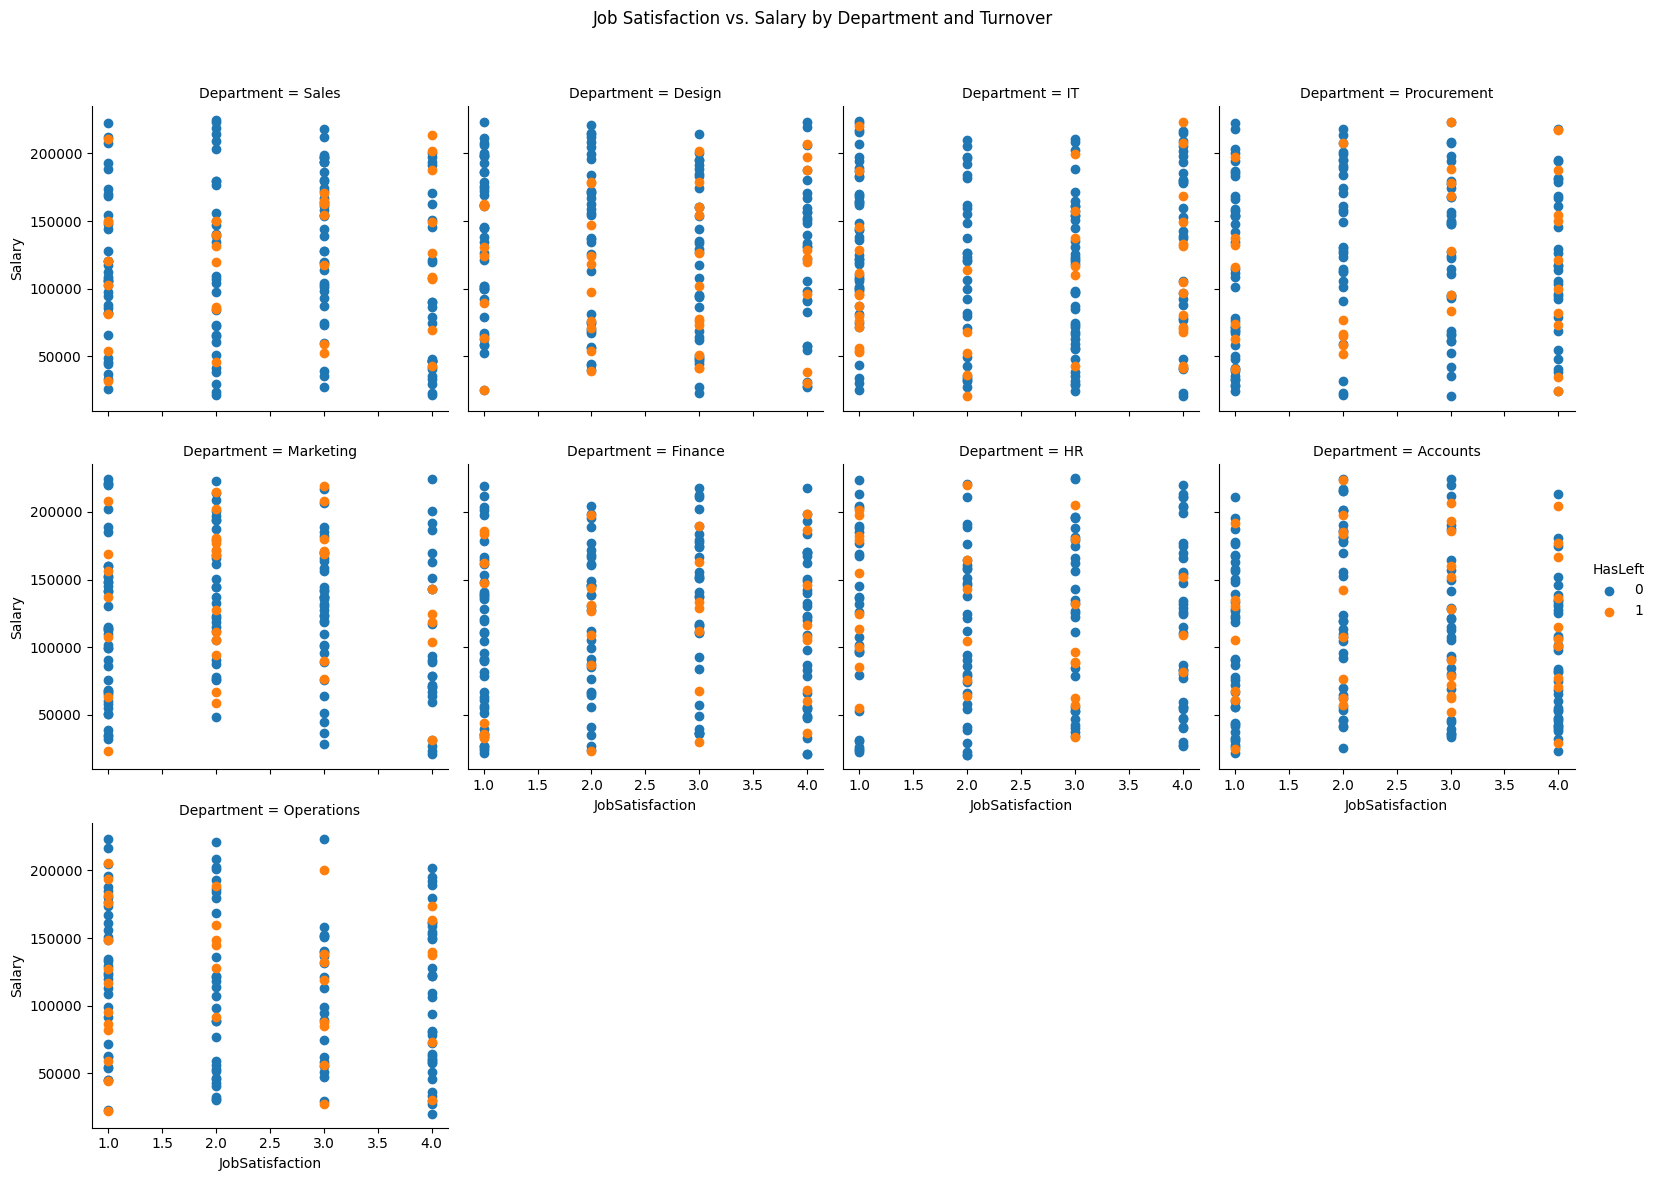

In [8]:

# Bivariate Analysis (Comparing Features)
# Count plots for categorical variables vs employee attrition (HasLeft)

categorical_columns = ['Gender', 'Department', 'JobRole', 'EducationField', 'Skills', 'HasLeft']

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue='HasLeft', data=df, order=df[column].value_counts().index)
    plt.title(f'Employee Turnover by {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title="Has Left", labels=['Stayed', 'Left'])
    plt.show()

# Scatterplot: Salary vs Job Satisfaction with Attrition
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Salary", y="JobSatisfaction", hue="HasLeft", data=df, alpha=0.7)
plt.title("Salary vs Job Satisfaction Based on Employee Turnover")
plt.xlabel("Salary")
plt.ylabel("Job Satisfaction")
plt.legend(title="Has Left", labels=['Stayed', 'Left'])
plt.show()


# Multivariate Analysis

# Pairplot for numerical features
numerical_cols = ['Age', 'Salary', 'Tenure', 'JobSatisfaction', 'PerformanceRating']
sns.pairplot(df, hue='HasLeft', vars=numerical_cols)  # Specify 'vars' to use numerical_cols and keep 'hue' for color coding
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Grouped boxplots (more than two variables)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', hue='HasLeft', data=df)
plt.title('Salary Distribution by Department and Turnover')
plt.xticks(rotation=45)
plt.show()


# Analyzing salary and job satisfaction based on department and turnover
g = sns.FacetGrid(df, col="Department", hue="HasLeft", col_wrap=4, height=4)
g = g.map(plt.scatter, "JobSatisfaction", "Salary")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Job Satisfaction vs. Salary by Department and Turnover')
plt.show()


In [9]:

# **Step 4: Statistical Modeling (Logistic, Probit, Linear Regression)**

#importing the required libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables using Label Encoding
categorical_columns = ['Gender', 'Department', 'JobRole', 'EducationField', 'Skills']
df_encoded = df.copy()
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Defining features (X) and target variable (y)
X = df_encoded.drop(columns=['HasLeft', 'EmployeeID'])
y = df_encoded['HasLeft'].astype(int)

# Adding a constant(bias(b)) for intercept
X = sm.add_constant(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fitting(training) Logistic Regression
logit_model = sm.Logit(y_train, X_train).fit()

# Fitting(training) Probit Regression
probit_model = sm.Probit(y_train, X_train).fit()

# Fitting(training) Linear Regression (LPM)
linear_model = sm.OLS(y_train, X_train).fit()

# Displaying Model Summaries
logit_model.summary(), probit_model.summary(), linear_model.summary()


Optimization terminated successfully.
         Current function value: 0.498475
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.498478
         Iterations 5


(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:                HasLeft   No. Observations:                 1200
 Model:                          Logit   Df Residuals:                     1185
 Method:                           MLE   Df Model:                           14
 Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                0.006141
 Time:                        08:51:53   Log-Likelihood:                -598.17
 converged:                       True   LL-Null:                       -601.87
 Covariance Type:            nonrobust   LLR p-value:                    0.9185
                             coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------------------------------
 const                    -1.0777      0.533     -2.024      0.043      -2.122      -0.034
 Age                      -0.0081    

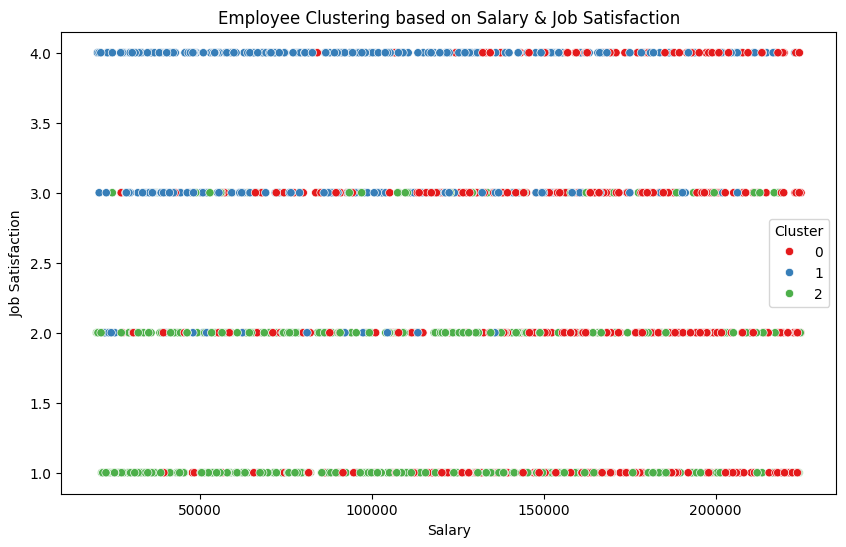

In [10]:
# **Step 5: Clustering Using Centroid-Based Method**
from scipy.cluster.vq import kmeans, vq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical features for clustering
clustering_features = ['Age', 'Salary', 'Tenure', 'JobSatisfaction', 'PerformanceRating',
                       'WorkLifeBalance', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'PromotionsLast5Years']

X_cluster = df_encoded[clustering_features].values

# Normalizing the data for clustering
X_cluster = (X_cluster - X_cluster.mean(axis=0)) / X_cluster.std(axis=0)

# Applying K-Means clustering with 3 clusters
centroids, _ = kmeans(X_cluster, 3)
cluster_labels, _ = vq(X_cluster, centroids)

# Adding cluster labels to the dataset
df_encoded['Cluster'] = cluster_labels

# Displaying dataset with cluster labels
df_encoded.head()

# Visualizing clusters using Salary and Job Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['Salary'], y=df_encoded['JobSatisfaction'], hue=df_encoded['Cluster'], palette='Set1')
plt.xlabel("Salary")
plt.ylabel("Job Satisfaction")
plt.title("Employee Clustering based on Salary & Job Satisfaction")
plt.legend(title="Cluster")
plt.show()


In [11]:
# **Step 6: Association Rule Learning (Apriori Algorithm)**
from mlxtend.frequent_patterns import apriori, association_rules #importing apriori algorithm and association rule from mlxtend library

# Converting categorical columns into one-hot encoded format
df_onehot = pd.get_dummies(df_encoded[['Department', 'JobRole', 'EducationField', 'Skills']])

# Converting all non-zero values to 1 (Boolean format)
df_onehot = df_onehot.applymap(lambda x: 1 if x > 0 else 0)

# Applying Apriori Algorithm
frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Displaying association rules
rules


<ipython-input-11-8cc47fa84a47>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_onehot = df_onehot.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(JobRole),(Department),0.793333,0.880667,0.699333,0.881513,1.000961,1.0,0.000671,1.007139,0.004643,0.717510,0.007089,0.837804
1,(Department),(JobRole),0.880667,0.793333,0.699333,0.794095,1.000961,1.0,0.000671,1.003701,0.008042,0.717510,0.003687,0.837804
2,(EducationField),(Department),0.840000,0.880667,0.741333,0.882540,1.002127,1.0,0.001573,1.015946,0.013264,0.756978,0.015696,0.862163
3,(Department),(EducationField),0.880667,0.840000,0.741333,0.841787,1.002127,1.0,0.001573,1.011292,0.017785,0.756978,0.011166,0.862163
4,(Skills),(Department),0.943333,0.880667,0.832667,0.882686,1.002292,1.0,0.001904,1.017209,0.040362,0.839946,0.016918,0.914091
5,(Department),(Skills),0.880667,0.943333,0.832667,0.945496,1.002292,1.0,0.001904,1.039676,0.019166,0.839946,0.038162,0.914091
6,(JobRole),(EducationField),0.793333,0.840000,0.669333,0.843697,1.004402,1.0,0.002933,1.023656,0.021206,0.694329,0.023109,0.820261
7,(EducationField),(JobRole),0.840000,0.793333,0.669333,0.796825,1.004402,1.0,0.002933,1.017188,0.027390,0.694329,0.016897,0.820261
8,"(JobRole, EducationField)",(Department),0.669333,0.880667,0.590667,0.882470,1.002048,1.0,0.001207,1.015345,0.006180,0.615705,0.015113,0.776587
9,"(JobRole, Department)",(EducationField),0.699333,0.840000,0.590667,0.844614,1.005493,1.0,0.003227,1.029693,0.018169,0.622628,0.028837,0.773894
